In [ ]:
!pip install llnl-thicket==2024.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import sys
sys.path.append("/thicket")
from glob import glob
from tabulate import tabulate

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define the path to your caliper folder in Google Drive
caliper_folder = '/content/drive/My Drive/finalCali/'

# List the files in the caliper folder to verify
files = os.listdir(caliper_folder)
print(files)


['p128-a1048576-2.cali', 'p128-a16777216-1.cali', 'p128-a1048576-3.cali', 'p128-a1048576-1.cali', 'p128-a262144-0.cali', 'p128-a16777216-0.cali', 'p128-a16777216-3.cali', 'p128-a1048576-0.cali', 'p128-a16777216-2.cali', 'p16-a16777216-1.cali', 'p16-a1048576-0.cali', 'p128-a65536-1.cali', 'p16-a16777216-2.cali', 'p128-a262144-1.cali', 'p128-a4194304-2.cali', 'p128-a4194304-3.cali', 'p16-a1048576-2.cali', 'p16-a262144-0.cali', 'p16-a16777216-3.cali', 'p128-a65536-3.cali', 'p16-a262144-3.cali', 'p128-a4194304-0.cali', 'p128-a67108864-3.cali', 'p16-a1048576-1.cali', 'p128-a65536-0.cali', 'p128-a4194304-1.cali', 'p128-a65536-2.cali', 'p128-a262144-3.cali', 'p128-a67108864-0.cali', 'p16-a4194304-0.cali', 'p16-a262144-1.cali', 'p128-a262144-2.cali', 'p16-a262144-2.cali', 'p128-a67108864-2.cali', 'p16-a1048576-3.cali', 'p16-a16777216-0.cali', 'p128-a67108864-1.cali', 'p2-a65536-3.cali', 'p16-a67108864-2.cali', 'p2-a16777216-2.cali', 'p2-a65536-1.cali', 'p2-a262144-2.cali', 'p2-a16777216-3.cali

Read all files

In [ ]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob(os.path.join(caliper_folder, "*.cali")))

(2/2) Creating Thicket: 100%|██████████| 215/215 [00:05<00:00, 39.81it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [ ]:
print(tk.metadata)

           cali.caliper.version  mpi.world.size  \
profile                                           
28782677                 2.11.0               8   
83525606                 2.11.0               4   
90591931                 2.11.0              32   
106761405                2.11.0             128   
121626876                2.11.0              32   
...                         ...             ...   
4087573828               2.11.0              16   
4096340467               2.11.0               8   
4118899178               2.11.0               2   
4201418593               2.11.0               8   
4289244998               2.11.0               4   

                                                 spot.metrics  \
profile                                                         
28782677    min#inclusive#sum#time.duration,max#inclusive#...   
83525606    min#inclusive#sum#time.duration,max#inclusive#...   
90591931    min#inclusive#sum#time.duration,max#inclusive#...   
106761405  

View Calltree

In [ ]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.000 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
352.707 main
├─ 0.012 comm
│  └─ 0.012 comm-small
│     ├─ 0.002 MPI_Allgather
│     ├─ 0.009 MPI_Allreduce
│     └─ 0.001 MPI_Barrier
├─ 342.767 comp
│  ├─ 284.166 comp-large
│  │  └─ 273.989 comm
│  │     └─ 251.806 comm-large
│  │        ├─ 206.097 MPI_Recv
│  │        └─ 12.458 MPI_Send
│  └─ 58.600 comp-small
│     └─ 58.585 MPI_Barrier
├─ 9.921 correctness-check
│  ├─ 0.000 MPI_Allreduce
│  ├─ 8.677 MPI_Barrier
│  ├─ 0.000 MPI_Recv
│  └─ 0.000 MPI_Send
└─ 0.005 data-init-runtime



Group Performance data by `matrix_size` in the Thicket metadata table.

In [ ]:
tk.metadata.columns


Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:profile.mpi', 'spot:region.count', 'spot:time.exclusive',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'algorithm', 'programming_model', 'data_type', 'size_of_data_type',
       'input_size', 'input_type', 'num_procs', 'scalability', 'group_num',
       'implementation_source'],
      dtype='object')

In [ ]:
tk.dataframe.columns

Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank', 'Calls/rank (min)',
       'Calls/rank (avg)', 'Calls/rank (max)', 'Calls/rank (total)',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'name'],
      dtype='object')

In [ ]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [ ]:
def plot_mpl(df, title, xlabel, ylabel, legend):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [ ]:
tk.metadata.index

Index([  28782677,   83525606,   90591931,  106761405,  121626876,  135033860,
        168237012,  181235326,  191871761,  193189251,
       ...
       4015998279, 4045322438, 4050801192, 4074726505, 4081110326, 4087573828,
       4096340467, 4118899178, 4201418593, 4289244998],
      dtype='int64', name='profile', length=224)

In [ ]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe

profile  \
node                                              num_procs input_size input_type                   
{'name': 'MPI_Comm_dup', 'type': 'function'}      2         65536      1%% perturbed   1187965215   
                                                                       Random          3136394658   
                                                                       Reverse sorted  2535894113   
                                                                       Sorted          2702820771   
                                                            262144     1%% perturbed   3440826546   
...                                                                                           ...   
{'name': 'data-init-runtime', 'type': 'function'} 512       16777216   Sorted          4015998279   
                                                            67108864   1%% perturbed    198021172   
                                                                       Random           964331996   
                                                                       Reverse sorted  3065093236   
                                                                       Sorted           860766414   

                                                                                        nid  \
node                                              num_procs input_size input_type             
{'name': 'MPI_Comm_dup', 'type': 'function'}      2         65536      1%% perturbed   27.0   
                                                                       Random          27.0   
                                                                       Reverse sorted  27.0   
                                                                       Sorted          27.0   
                                                            262144     1%% perturbed   27.0   
...                                                                                     ...   
{'name': 'data-init-runtime', 'type': 'function'} 512       16777216   Sorted           2.0   
                                                            67108864   1%% perturbed    2.0   
                                                                       Random           2.0   
                                                                       Reverse sorted   2.0   
                                                                       Sorted           2.0   

                                                                                        spot.channel  \
node                                              num_procs input_size input_type                      
{'name': 'MPI_Comm_dup', 'type': 'function'}      2         65536      1%% perturbed   regionprofile   
                                                                       Random          regionprofile   
                                                                       Reverse sorted  regionprofile   
                                                                       Sorted          regionprofile   
                                                            262144     1%% perturbed   regionprofile   
...                                                                                              ...   
{'name': 'data-init-runtime', 'type': 'function'} 512       16777216   Sorted          regionprofile   
                                                            67108864   1%% perturbed   regionprofile   
                                                                       Random          regionprofile   
                                                                       Reverse sorted  regionprofile   
                                                                       Sorted          regionprofile   

                                                                                       Min time/rank  \
node                                              num_procs input_size input_type  

In [ ]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512]
array_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864]
input_types = ["Random", "Sorted", "Reverse sorted", '1%% perturbed']

In [34]:
title_template = "{} section for {} array size"
for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp-large' or node.frame['name'] == 'comm':
        for arraySize in array_sizes:
            graphTitle = title_template.format(node.frame['name'], arraySize)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_size') == arraySize])
            df = df.unstack(level="input_type")
            df = df.unstack(level="input_size")
            print(f"Data for {graphTitle}:")
            print(df)
            plot_mpl(df, graphTitle, "Processes", "Time (s)", input_types)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
title_template0 = "Strong Scaling - {}  - {}"

for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp-large' or node.frame['name'] == 'comm':
        print(node.frame['name'])
        for types in input_types:
            graphTitle = title_template0.format(node.frame['name'], types)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == types])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")
            t1Times = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]

            for i in range(0,len(t1Times)):
                t1 = t1Times[i]
                df[array_sizes[i]] = (df[array_sizes[i]] / (2*t1))**-1
            plot_mpl(df, graphTitle, "Processes", "Speedup", array_sizes)
            print(df[array_sizes[3]])

Output hidden; open in https://colab.research.google.com to view.

/content/drive/My Drive/finalCali/p2-a262144-0.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 19.78it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[31.769819]
[0.00208]
[25.709364]
[23.475459]
/content/drive/My Drive/finalCali/p8-a1048576-0.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[83.613605]
[0.023646]
[69.335879]
[66.768733]
/content/drive/My Drive/finalCali/p32-a4194304-0.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[174.255761]
[0.045296]
[128.941495]
[126.368362]
/content/drive/My Drive/finalCali/p128-a16777216-0.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[470.825594]
[0.026789]
[331.255582]
[328.303102]
/content/drive/My Drive/finalCali/p512-a67108864-0.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[1093.509261]
[0.081612]
[728.16952]
[725.21757]
/content/drive/My Drive/finalCali/p2-a262144-1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 21.14it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[31.334679]
[0.002862]
[25.580052]
[23.368885]
/content/drive/My Drive/finalCali/p8-a1048576-1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 20.18it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[88.101272]
[0.009961]
[73.637772]
[71.062963]
/content/drive/My Drive/finalCali/p32-a4194304-1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 16.40it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[199.658298]
[0.017797]
[147.92483]
[145.338786]
/content/drive/My Drive/finalCali/p128-a16777216-1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 16.81it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[556.758128]
[0.033629]
[397.711294]
[394.764053]
/content/drive/My Drive/finalCali/p512-a67108864-1.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[1343.362559]
[0.166801]
[914.986775]
[912.028428]
/content/drive/My Drive/finalCali/p2-a262144-2.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 20.56it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[31.576237]
[0.002667]
[25.58035]
[23.37108]
/content/drive/My Drive/finalCali/p8-a1048576-2.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[87.073391]
[0.009429]
[72.546231]
[69.95184]
/content/drive/My Drive/finalCali/p32-a4194304-2.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 17.45it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[175.119053]
[0.018999]
[129.386371]
[126.80581]
/content/drive/My Drive/finalCali/p128-a16777216-2.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 20.60it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[495.899432]
[0.091079]
[336.627726]
[333.652313]
/content/drive/My Drive/finalCali/p512-a67108864-2.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 19.01it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[1094.879355]
[0.085544]
[730.927843]
[727.977411]
/content/drive/My Drive/finalCali/p2-a262144-3.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 12.62it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[31.002539]
[0.00193]
[25.144664]
[22.966425]
/content/drive/My Drive/finalCali/p8-a1048576-3.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[83.450423]
[0.009938]
[69.346171]
[66.78151]
/content/drive/My Drive/finalCali/p32-a4194304-3.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[175.184108]
[0.021556]
[130.188488]
[127.611657]
/content/drive/My Drive/finalCali/p128-a16777216-3.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 20.93it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


[474.178003]
[0.031682]
[333.825411]
[330.864059]
/content/drive/My Drive/finalCali/p512-a67108864-3.cali


(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 18.92it/s]
0it [00:00, ?it/s]

[1131.443734]
[0.243221]
[747.921177]
[744.957546]



/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


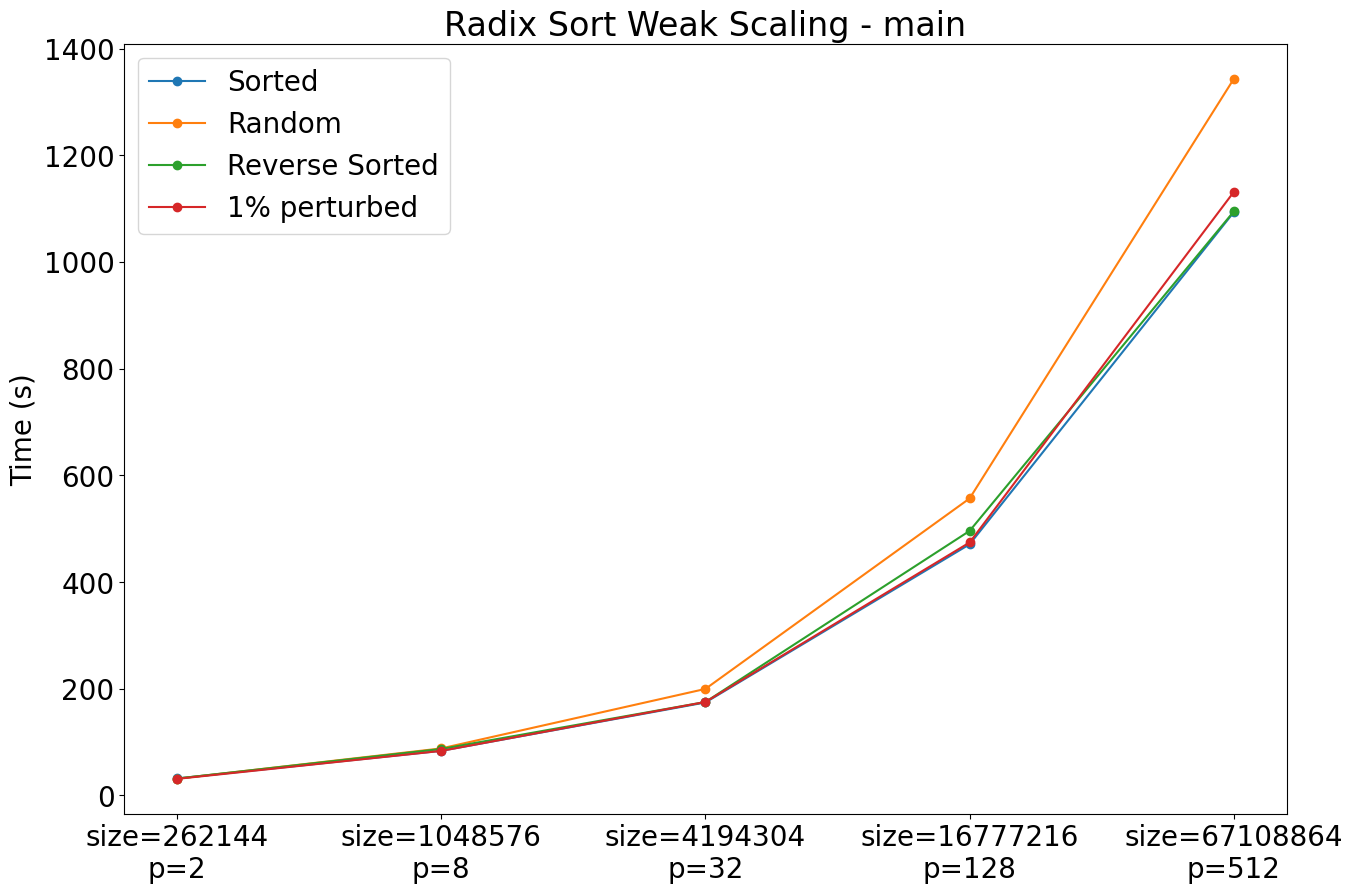

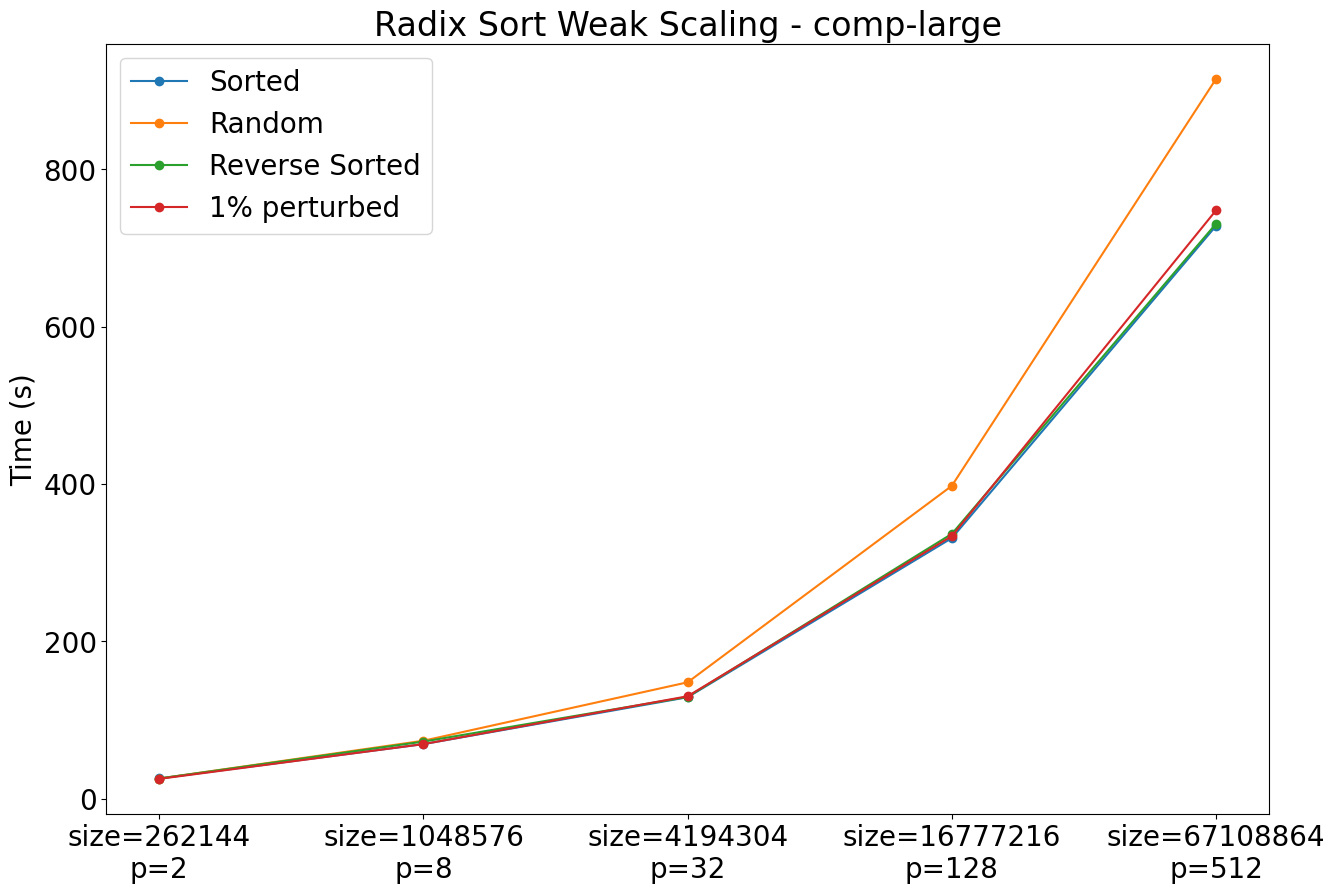

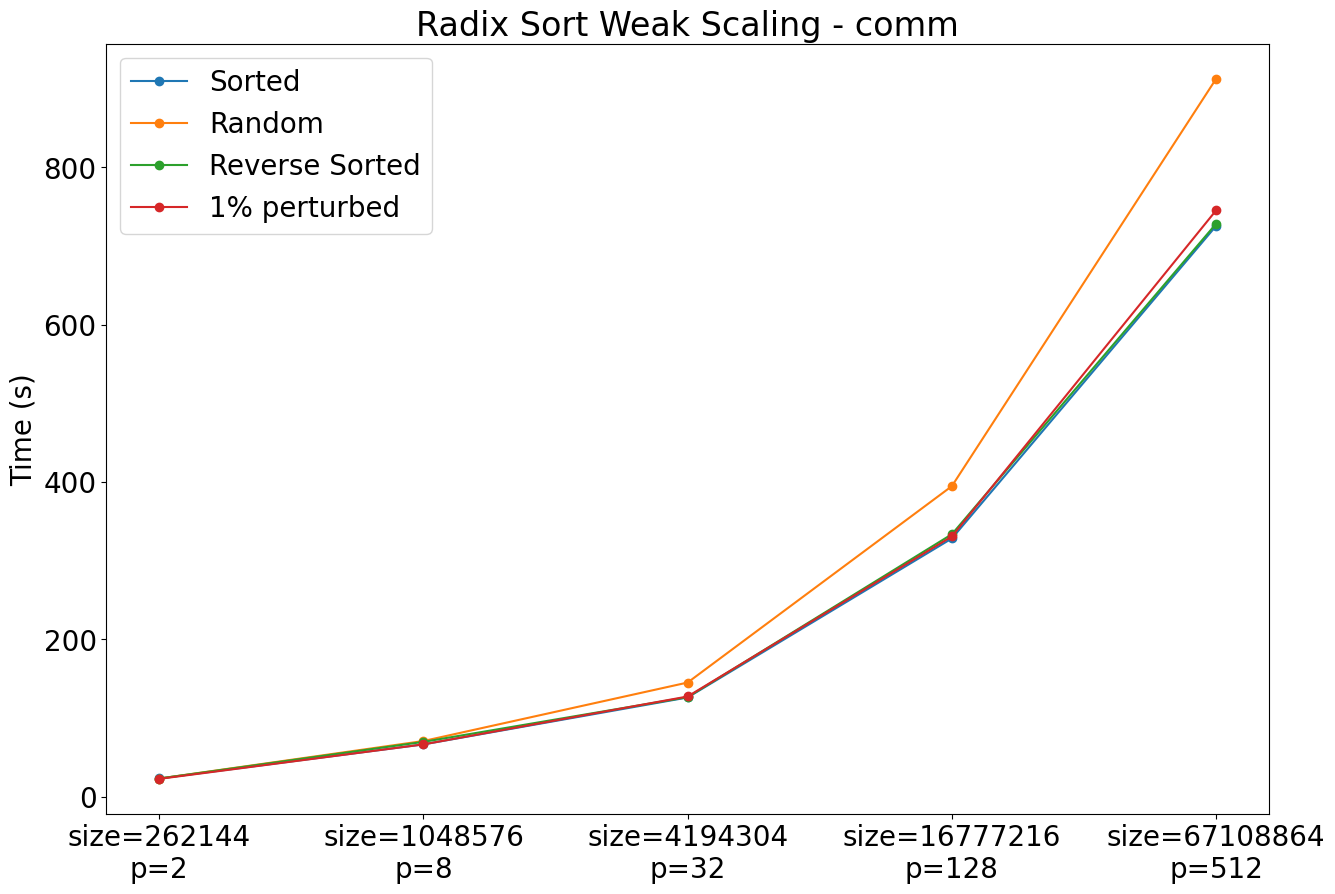

In [36]:
title_template0 = "Radix Sort Weak Scaling - {}"

pairs= [(2**18, 2), (2**20, 8), (2**22, 32), (2**24, 128), (2**26, 512)]
regions = ['main','comp-large','comm']
input_type = ['0','1','2','3']
x_labels = ['size={}\np={}'.format(n, p) for n, p in pairs]
data = {}
for itype in input_type:
    data[itype] = {region: [] for region in regions}

    for n, p in pairs:
        path = "/content/drive/My Drive/finalCali/p{}-a{}-{}.cali".format(p,n, itype)
        print(path)
        tk_tmp = th.Thicket.from_caliperreader(glob(path))
        tk_tmp.metadata_column_to_perfdata("num_procs")
        tk_tmp.metadata_column_to_perfdata("input_size")
        for node in tk_tmp.graph.traverse():
            if (node.frame['name'] not in regions):
                continue

            value = list(tk_tmp.dataframe.loc[node, 'Avg time/rank'])
            print(value)
            if value[0] > 1:
              data[itype][node.frame['name']].append(value[0])

for region in regions:
    title = title_template0.format(region)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)

    for t in input_type:
      if(t=='0'):
        ax.plot(range(len(data[t][region])), data[t][region], label="Sorted", marker='o')
      if(t=='1'):
        ax.plot(range(len(data[t][region])), data[t][region],label="Random", marker='o')
      if(t=='2'):
        ax.plot(range(len(data[t][region])), data[t][region], label="Reverse Sorted", marker='o')
      if(t=='3'):
        ax.plot(range(len(data[t][region])), data[t][region], label="1% perturbed", marker='o')

    ax.set_title(title)
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.xticks(range(len(pairs)))
    ax.set_xticklabels(x_labels)
    plt.show()